In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

stop = stopwords.words('english')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
warnings.filterwarnings('ignore')

In [17]:
para = """Zooming In on the Andromeda Galaxy, also known as Gigapixels of Andromeda, is a 2015 composite photograph of the Andromeda Galaxy produced by the Hubble Space Telescope. It is 1.5 billion pixels in size, and is the largest image ever released by the telescope.[1] At the time of its release to the public, the image was one of the largest ever taken.[2]

In late 2011, the Panchromatic Hubble Andromeda Treasury (PHAT) was set up,[1] which was tasked with mapping one-third of the stars within the Andromeda Galaxy. As of 2024, the survey has detected an estimated 117,000,000 astronomical objects using six light filters.[3][4]

The image depicts the left-most side of the Andromeda Galaxy's galactic disc in visible light,[5][6] and the displayed section is approximately 61,000 light-years across.[7][8] The image shows the galaxy's 100 million stars of varying types and thousands of star clusters.[7][9][10] In the bottom-left of the image is the galaxy's nucleus, and dust lanes are also visible.[11] Several other deep-space objects are visible in the image, including background galaxies. Stars within the Milky Way are also visible, and are typically larger than stars within the Andromeda Galaxy.[12][13]

The final composite was stitched together using 411 exposures taken from July 2010 to October 2013,[14] and the image was first displayed at the 225th meeting of the American Astronomical Society in Seattle, Washington.[7][15] The mosaic is the largest and sharpest composite photograph ever taken of the Andromeda Galaxy, and the largest ever taken by the Hubble Space Telescope.[1][16] At the time of its release, the image was also one of the largest throughout all photographs.[2] The image has been used to help astronomers detect more Andromeda-like spiral galaxies using light.[5]"""

In [3]:
para

"Zooming In on the Andromeda Galaxy, also known as Gigapixels of Andromeda, is a 2015 composite photograph of the Andromeda Galaxy produced by the Hubble Space Telescope. It is 1.5 billion pixels in size, and is the largest image ever released by the telescope.[1] At the time of its release to the public, the image was one of the largest ever taken.[2]\n\nIn late 2011, the Panchromatic Hubble Andromeda Treasury (PHAT) was set up,[1] which was tasked with mapping one-third of the stars within the Andromeda Galaxy. As of 2024, the survey has detected an estimated 117,000,000 astronomical objects using six light filters.[3][4]\n\nThe image depicts the left-most side of the Andromeda Galaxy's galactic disc in visible light,[5][6] and the displayed section is approximately 61,000 light-years across.[7][8] The image shows the galaxy's 100 million stars of varying types and thousands of star clusters.[7][9][10] In the bottom-left of the image is the galaxy's nucleus, and dust lanes are also v

In [10]:
token = nltk.word_tokenize(para)

In [12]:
token_words = [i for i in token if i.isalpha()]

In [20]:
meaning_words = [w for w in token_words if not w in stop]

In [22]:
joined_words = ' '.join(meaning_words)

In [32]:
joined_words

'Zooming In Andromeda Galaxy also known Gigapixels Andromeda composite photograph Andromeda Galaxy produced Hubble Space Telescope It billion pixels size largest image ever released telescope At time release public image one largest ever taken In late Panchromatic Hubble Andromeda Treasury PHAT set tasked mapping stars within Andromeda Galaxy As survey detected estimated astronomical objects using six light filters The image depicts side Andromeda Galaxy galactic disc visible light displayed section approximately across The image shows galaxy million stars varying types thousands star clusters In image galaxy nucleus dust lanes also visible Several objects visible image including background galaxies Stars within Milky Way also visible typically larger stars within Andromeda Galaxy The final composite stitched together using exposures taken July October image first displayed meeting American Astronomical Society Seattle Washington The mosaic largest sharpest composite photograph ever ta

In [30]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (30, 20),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

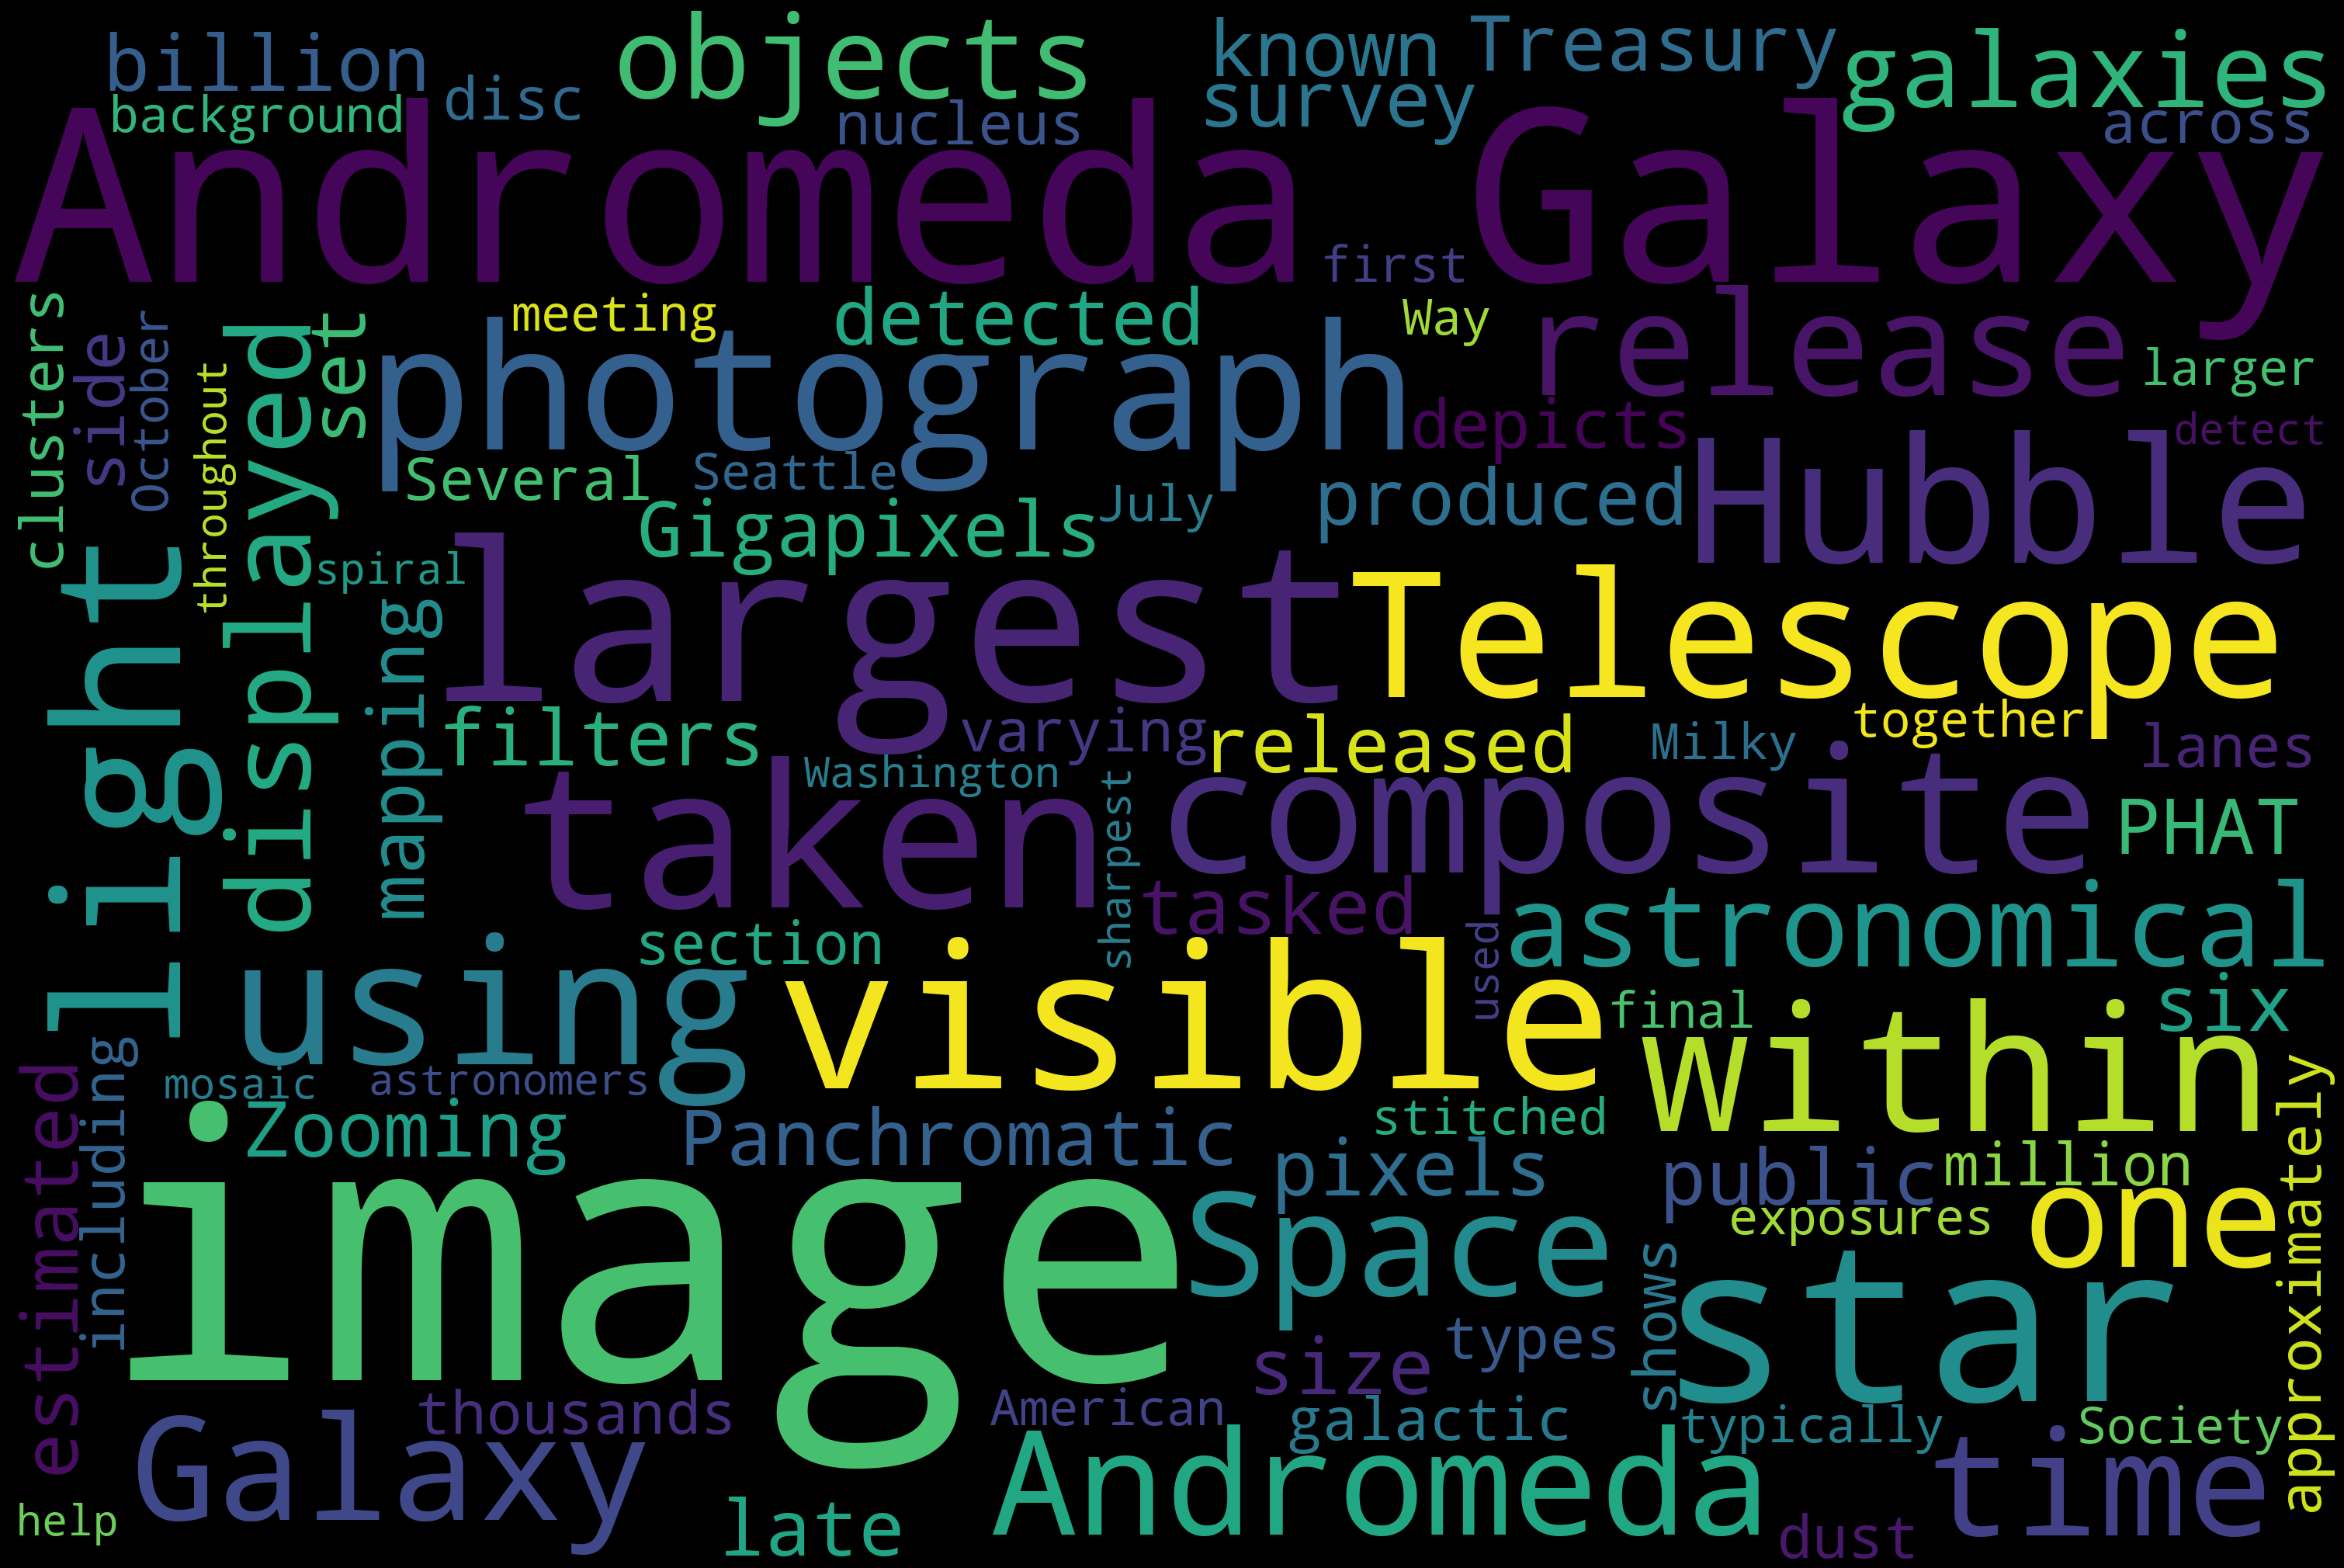

In [31]:
generate_word_cloud(joined_words)

In [39]:
import re

joined_words = joined_words.lower()
words = re.sub(r'[^\w\s]', '', joined_words).split()

In [53]:
joined_words

'zooming in andromeda galaxy also known gigapixels andromeda composite photograph andromeda galaxy produced hubble space telescope it billion pixels size largest image ever released telescope at time release public image one largest ever taken in late panchromatic hubble andromeda treasury phat set tasked mapping stars within andromeda galaxy as survey detected estimated astronomical objects using six light filters the image depicts side andromeda galaxy galactic disc visible light displayed section approximately across the image shows galaxy million stars varying types thousands star clusters in image galaxy nucleus dust lanes also visible several objects visible image including background galaxies stars within milky way also visible typically larger stars within andromeda galaxy the final composite stitched together using exposures taken july october image first displayed meeting american astronomical society seattle washington the mosaic largest sharpest composite photograph ever ta

In [54]:
lemme = WordNetLemmatizer()

lemme_para = " ".join([lemme.lemmatize(word) for word in words])

In [55]:
lemme_para

'zooming in andromeda galaxy also known gigapixels andromeda composite photograph andromeda galaxy produced hubble space telescope it billion pixel size largest image ever released telescope at time release public image one largest ever taken in late panchromatic hubble andromeda treasury phat set tasked mapping star within andromeda galaxy a survey detected estimated astronomical object using six light filter the image depicts side andromeda galaxy galactic disc visible light displayed section approximately across the image show galaxy million star varying type thousand star cluster in image galaxy nucleus dust lane also visible several object visible image including background galaxy star within milky way also visible typically larger star within andromeda galaxy the final composite stitched together using exposure taken july october image first displayed meeting american astronomical society seattle washington the mosaic largest sharpest composite photograph ever taken andromeda gal

In [56]:
stem = PorterStemmer()

stem_para = " ".join([stem.stem(word) for word in words])
stem_para

'zoom in andromeda galaxi also known gigapixel andromeda composit photograph andromeda galaxi produc hubbl space telescop it billion pixel size largest imag ever releas telescop at time releas public imag one largest ever taken in late panchromat hubbl andromeda treasuri phat set task map star within andromeda galaxi as survey detect estim astronom object use six light filter the imag depict side andromeda galaxi galact disc visibl light display section approxim across the imag show galaxi million star vari type thousand star cluster in imag galaxi nucleu dust lane also visibl sever object visibl imag includ background galaxi star within milki way also visibl typic larger star within andromeda galaxi the final composit stitch togeth use exposur taken juli octob imag first display meet american astronom societi seattl washington the mosaic largest sharpest composit photograph ever taken andromeda galaxi largest ever taken hubbl space telescop at time releas imag also one largest through